In [169]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [170]:
x_train = np.loadtxt('train_X.csv',delimiter=',').T
y_train = np.loadtxt('train_label.csv',delimiter=',').T

x_test = np.loadtxt('test_X.csv',delimiter=',').T
y_test = np.loadtxt('test_label.csv',delimiter=',').T


In [171]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (784, 1000)
y_train (10, 1000)
x_test (784, 350)
y_test (10, 350)


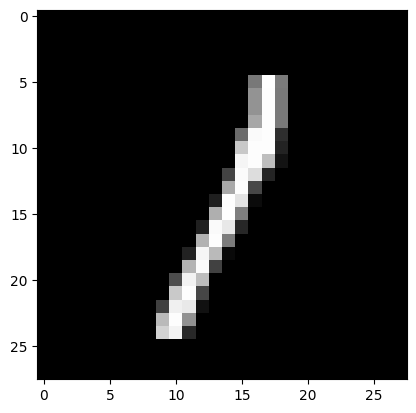

In [172]:
plt.imshow(x_train[:,101].reshape(28,28),cmap='gray')
plt.show()

In [173]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    e_x = np.exp(x)
    return e_x/np.sum(e_x,axis=0)

In [174]:
def der_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def der_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [175]:
# np.random.seed(0)
def initial_param(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x) * 0.001
    w2 = np.random.randn(n_y,n_h) * 0.001
    b1 = np.zeros((n_h,1))
    b2 = np.zeros((n_y,1))
    params = {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }
    return params


In [176]:
def cost(a2,y):
    m = y.shape[1]
    temp_cost = -(1/m)*np.sum(y*np.log(a2))
    return temp_cost


In [177]:
def forward_propagation(x,params):
    w1 = params["w1"]
    w2 = params["w2"]
    b1 = params["b1"]
    b2 = params["b2"]

    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)

    forward_params = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    return forward_params

In [178]:
def backPropagation(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    # dz1 = (1/m)*np.dot(w2.T, dz2)*der_tanh(a1)
    dz1 = np.dot(w2.T, dz2)*der_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients
    

In [179]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    params = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return params

In [180]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    # print(n_x,n_y)
    
    cost_list = []
    
    parameters = initial_param(n_x, n_h, n_y)
    
    # forward_cache = forward_propagation(x,params)
    # print(forward_cache)
    # testCost = cost(forward_cache["a2"],y)
    # print(testCost)
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        co = cost(forward_cache['a2'], y)
        
        gradients = backPropagation(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(co)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", co)
        
    return parameters, cost_list
    # return 0, cost_list

In [181]:
iterations = 101
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.3063771463830087
Cost after 10 iterations is : 1.6331745360678205
Cost after 20 iterations is : 0.4473282695876181
Cost after 30 iterations is : 0.30379784528519677
Cost after 40 iterations is : 0.2282578767485715
Cost after 50 iterations is : 0.17560800438922228
Cost after 60 iterations is : 0.14244839014589286
Cost after 70 iterations is : 0.11887245073272965
Cost after 80 iterations is : 0.09958379714515504
Cost after 90 iterations is : 0.08538600053899444


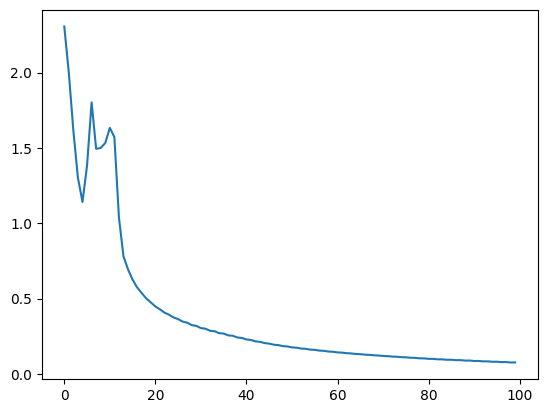

In [182]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [183]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [184]:
print("Accuracy of Train Dataset", accuracy(x_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.2 %
Accuracy of Test Dataset 85.71 %


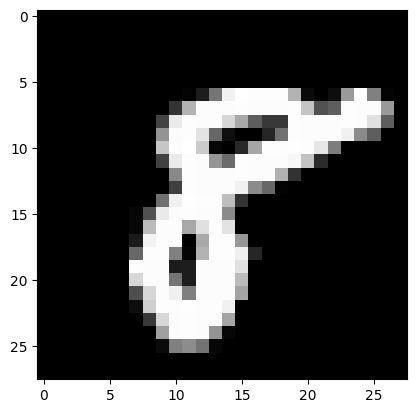

Our model says it is : 8


In [205]:
idx = int(random.randrange(0,x_test.shape[1]))
plt.imshow(x_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(x_test[:, idx].reshape(x_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])